In [1]:
import cv2
from skimage import io, img_as_float, img_as_ubyte
from matplotlib import pyplot as plt
from functions import apply_vegetative_index
import glob
import re
from skimage.filters import try_all_threshold, threshold_mean
import skimage.filters as skfil
from functions import reorder_file_paths

In [9]:
# Import image
img = cv2.imread('test_photos/image_14.jpg')

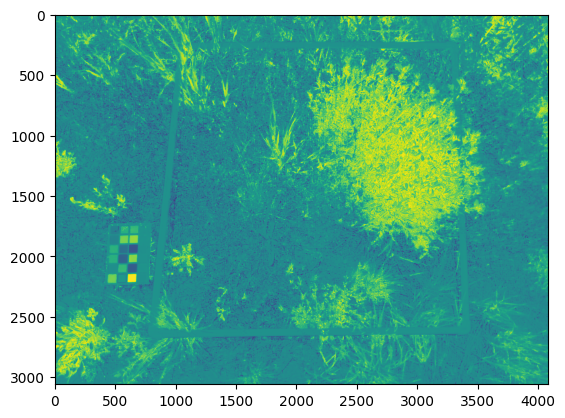

In [11]:
vegetated_img = apply_vegetative_index(img, index_type='rgbvi')

plt.imshow(vegetated_img)

Now try it on all of the test images

In [ ]:
# Define a path to the folder that contains the photos I want to test with loops
path = 'test_photos/*'

# Function to extract numeric part of the filename for sorting
def numerical_sort(value):
    # Use regexp to extract the digits in the names
    numbers = re.findall(r'\d+', value)
    return int(numbers[0]) if numbers else 0

# Get a sorted list of files in the folder because otherwise, glob will read the files in the order determined by the operating system.
files = sorted(glob.glob(path), key = numerical_sort)

# Verify that the filenames are in order
print(files)

In [ ]:
# Loop through every file in the folder specified by the path
for i, file in enumerate(files):
    # Read in the color image
    img = cv2.imread(file)

    # Use the excess green vegetative index on every image
    vegetated_img = apply_vegetative_index(img, index_type='exg-exr')

    plt.imsave(f'results/vi_exg-exr/image_{i}.jpg', vegetated_img)

#     # Show each image in its own window.
#     cv2.imshow(f'image {i}', vegetated_img)

# # Allows you to close all windows (individually, or close all with ctrl+w)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

Joel would like to see these VI segmentations side by side.  
I'll do it for the methods at which I've gotten reasonable results - ExG, GRVI, and RGBVI.

In [ ]:
index_types = ['exg', 'grvi', 'rgbvi']

In [ ]:
# Try it on one image first
fig, axes = plt.subplots(nrows=1, ncols=2)

og_img = cv2.imread('test_photos/image_13.jpg')
modified_image = cv2.imread('results/vi_rgbvi/image_13.jpg')

# Convert images from BGR to RGB (since OpenCV loads images in BGR format)
og_img = cv2.cvtColor(og_img, cv2.COLOR_BGR2RGB)
modified_image = cv2.cvtColor(modified_image, cv2.COLOR_BGR2RGB)

axes[0].imshow(og_img)
axes[0].axis('off')  # Hide the axis

axes[1].imshow(modified_image)
axes[1].axis('off')  # Hide the axis

plt.savefig('results/vi_side_by_sides/sbs_image_2.jpg')


In [ ]:
for index_type in index_types:
    for i, file in enumerate(files):
        fig, axes = plt.subplots(nrows=1, ncols=2)

        og_img = cv2.imread(file)
        modified_image = cv2.imread(f'results/vi_{index_type}/image_{i}.jpg')

        # Convert images from BGR to RGB (since OpenCV loads images in BGR format)
        og_img = cv2.cvtColor(og_img, cv2.COLOR_BGR2RGB)
        modified_image = cv2.cvtColor(modified_image, cv2.COLOR_BGR2RGB)

        axes[0].imshow(og_img)
        axes[0].axis('off')  # Hide the axis

        axes[1].imshow(modified_image)
        axes[1].axis('off')  # Hide the axis

        plt.savefig(f'results/vi_side_by_sides/sbs_{index_type}_image_{i}.jpg')


Segment / threshold images based on results of RGBVI calculations

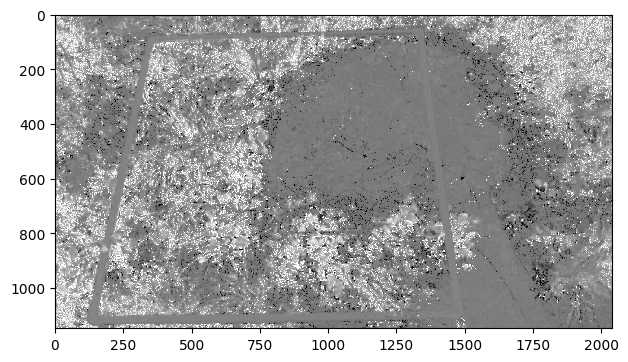

In [31]:
# Start rgbvi process fresh because I probably shouldn't use the color image that was saved because the grayscale images manifest in viridis
img = cv2.imread('test_photos/image_1.jpg')

img_rgbvi = apply_vegetative_index(img, index_type='rgbvi')

io.imshow(img_rgbvi)

# Convert the image to a float
img_float = img_as_float(img_rgbvi)

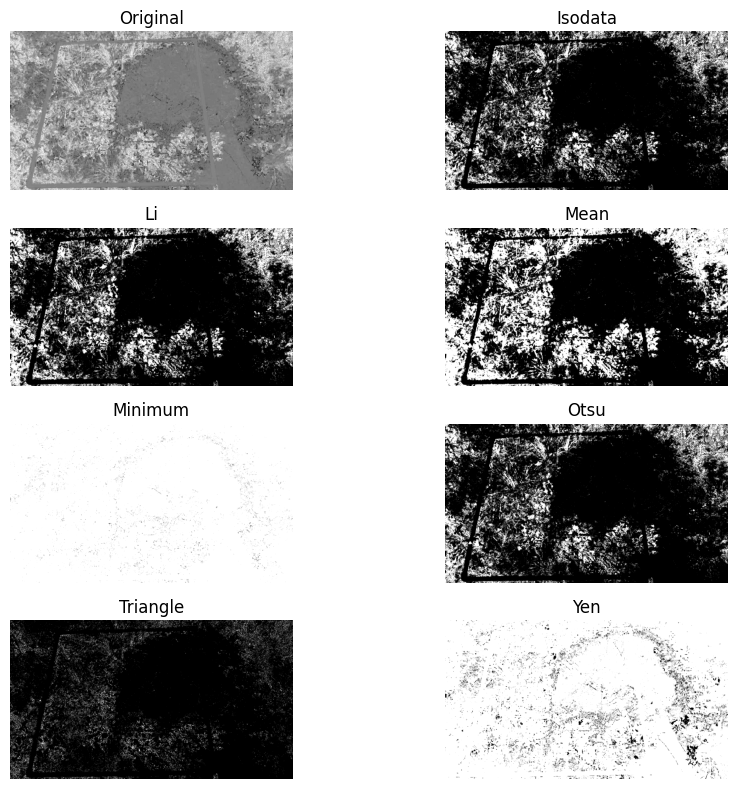

In [22]:
# Show different thresholding methods
fig, ax = try_all_threshold(img_float, figsize=(10,8), verbose=False)

Mean looks pretty good to me.

In [40]:
# Apply the mean threshold.
thresh_otsu = skfil.threshold_otsu(img_float)
thresh_mean = skfil.threshold_mean(img_float)


print(thresh_otsu, thresh_mean) # Threshold is the value that will be the cutoff for what is black and what is white.

# If image is <= to the threshold number, it's True. False otherwise.
binary_otsu = img_float <= thresh_otsu
binary_mean = img_float <= thresh_mean

cv2.imshow('binary otsu', img_as_ubyte(binary_otsu))
cv2.imshow('binary mean', img_as_ubyte(binary_mean))

cv2.waitKey(0)
cv2.destroyAllWindows()

0.669921875 0.5547556839569875


Now do it on all the images. 

In [9]:
files = reorder_file_paths('test_photos/*')

print(files)

['test_photos\\image_0.jpg', 'test_photos\\image_1.jpg', 'test_photos\\image_2.jpg', 'test_photos\\image_3.jpg', 'test_photos\\image_4.jpg', 'test_photos\\image_5.jpg', 'test_photos\\image_6.JPG', 'test_photos\\image_7.JPG', 'test_photos\\image_8.JPG', 'test_photos\\image_9.JPG', 'test_photos\\image_10.JPG', 'test_photos\\image_11.jpg', 'test_photos\\image_12.jpg', 'test_photos\\image_13.jpg', 'test_photos\\image_14.jpg', 'test_photos\\image_15.jpg', 'test_photos\\image_16.jpg', 'test_photos\\test_image_17.jpg', 'test_photos\\test_image_18.JPG', 'test_photos\\test_image_19.JPG', 'test_photos\\test_image_20.jpg', 'test_photos\\test_image_21.jpg', 'test_photos\\test_image_22.jpg', 'test_photos\\test_image_23.jpg', 'test_photos\\test_image_24.jpg']


In [18]:
# Loop through every file in the folder specified by the path
for i, file in enumerate(files):
    # Read in the color image
    img = cv2.imread(file)

    # Reduce the image size by half because the windows are too huge.
    img = cv2.resize(img, (0, 0), fx=.5, fy=.5)

    # Use the excess green vegetative index on every image
    rgbvi_img = apply_vegetative_index(img, index_type='rgbvi')

    # Convert image to a float
    img_float = img_as_float(rgbvi_img)

    # Apply Otsu threshold to image
    thresh_otsu = skfil.threshold_mean(img_float)

    # Pixel is true if it's over the threshold, and false otherwise
    binary_otsu = img_float <= thresh_otsu
    
    plt.imsave(f'results/post_rgbvi_thresholding/image_{i}_mean.jpg', binary_otsu)
#     cv2.imshow(f'otsu_test_{i}', img_as_ubyte(binary_otsu))

# cv2.waitKey(0)
# cv2.destroyAllWindows()

    

    